In [10]:
from nearline_helpers import *
%jsroot on

In [17]:
runs = [302]
t = r.TChain("tree")
for run in runs:
    t.Add(f"../bin/*run{run:05}*root")
t.GetEntries()

198941

In [13]:
t2 = r.TChain("tree")
for run in runs:
    t2.Add(f"../bin/run302_orig/*run{run:05}*root")
t2.GetEntries()

189300

In [32]:
h1 = r.TH2D("h1","Before; Pulse Integral; Pulse Amplitude",1000,0,250000,1000,0,2500)
h2 = r.TH2D("h2","After; Pulse Integral; Pulse Amplitude",1000,0,250000,1000,0,2500)
t.Draw("integrals.amplitude:integrals.integral>>h1", "amcNum == 1 && channelTag == 1","goff")
t2.Draw("integrals.amplitude:integrals.integral>>h2","amcNum == 1 && channelTag == 1","goff")

89943

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [33]:
h1p = uproot.from_pyroot(h1).to_hist()
h2p = uproot.from_pyroot(h2).to_hist()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fbd6f3990d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fbd91759f10>, text=[])

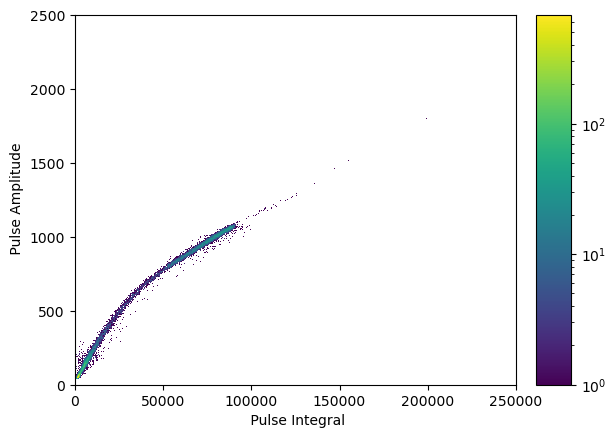

In [39]:
h1p.plot(
    norm=matplotlib.colors.LogNorm(vmin=1)
)

/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


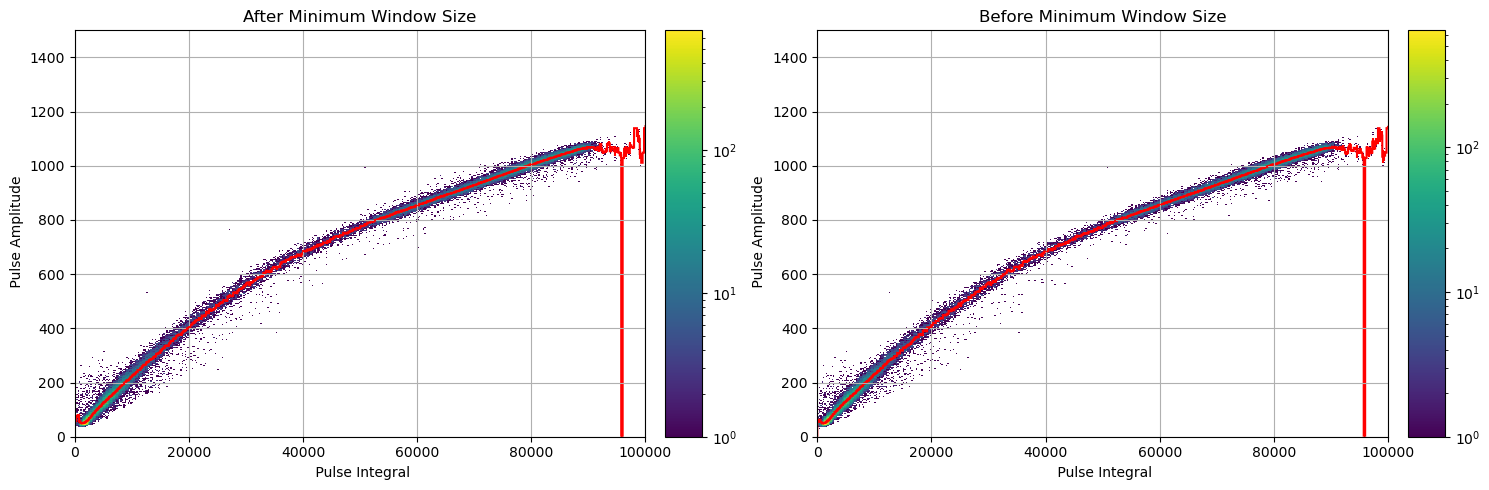

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_title("After Minimum Window Size")
h1p[:100000j,:1500j].plot(ax=ax[0],norm=matplotlib.colors.LogNorm(vmin=1))
h1p.profile(1).plot(color='r', ax=ax[0])

ax[1].set_title("Before Minimum Window Size")
h2p[:100000j,:1500j].plot(ax=ax[1],norm=matplotlib.colors.LogNorm(vmin=1))
h2p.profile(1).plot(color='r', ax=ax[1])
for axi in ax:
    axi.grid()
plt.tight_layout()
plt.show()

/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


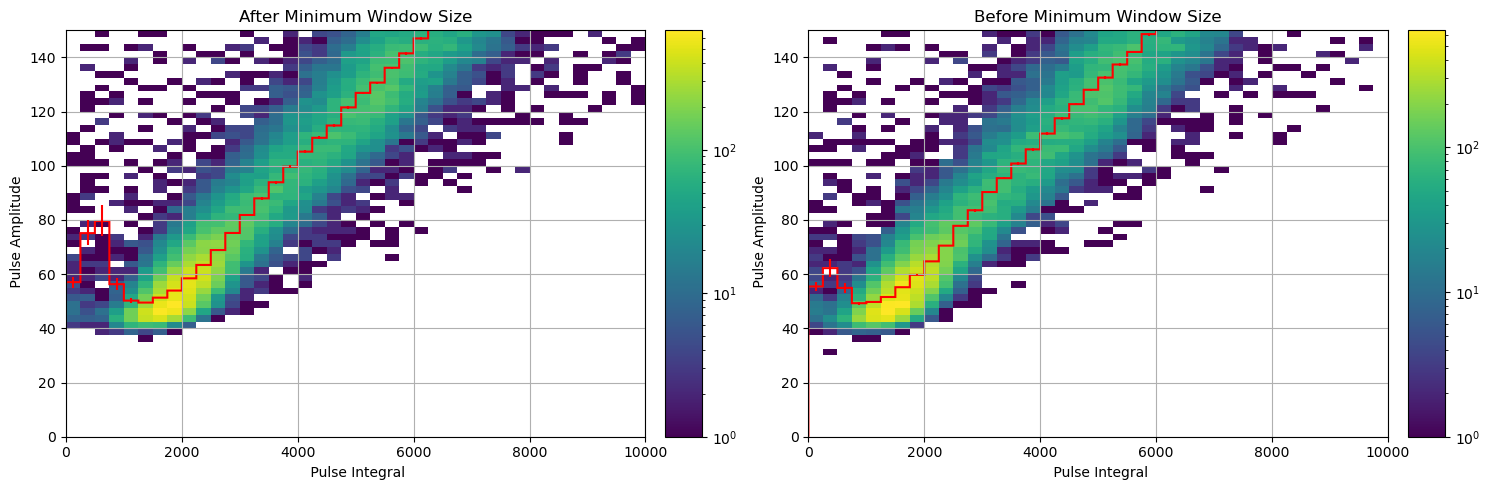

In [41]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_title("After Minimum Window Size")
h1p[:10000j,:150j].plot(ax=ax[0],norm=matplotlib.colors.LogNorm(vmin=1))
h1p.profile(1).plot(color='r', ax=ax[0])

ax[1].set_title("Before Minimum Window Size")
h2p[:10000j,:150j].plot(ax=ax[1],norm=matplotlib.colors.LogNorm(vmin=1))
h2p.profile(1).plot(color='r', ax=ax[1])
for axi in ax:
    axi.grid()
plt.tight_layout()
plt.show()

/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


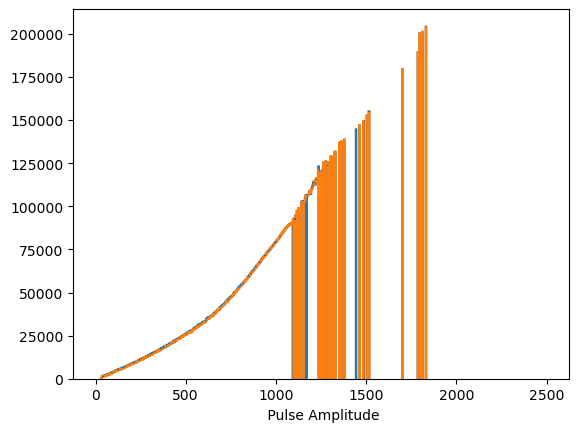

In [45]:
h1p.profile(0)[:].plot()
h2p.profile(0)[:].plot()
plt.show()

In [20]:
c = r.TCanvas()
t2.Draw("integrals.amplitude:integrals.integral>>h2","amcNum == 1 && channelTag == 1","colz")
c.Draw()

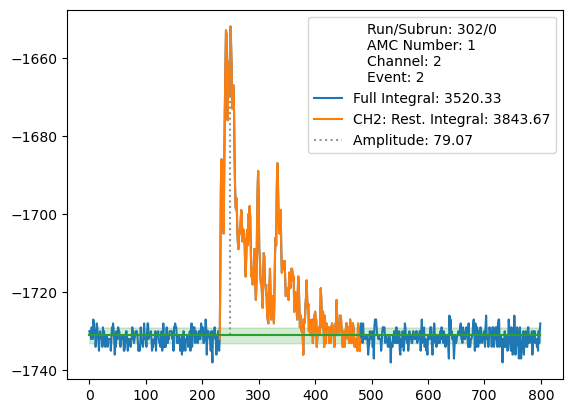

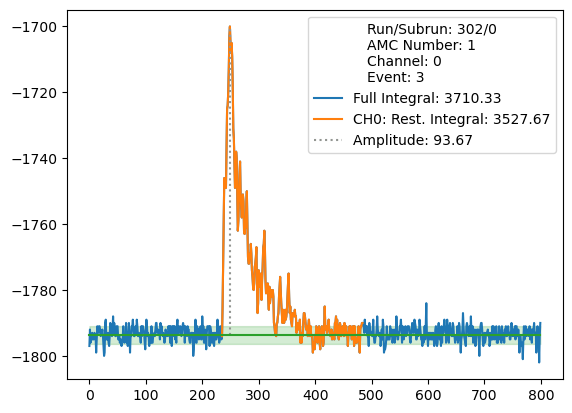

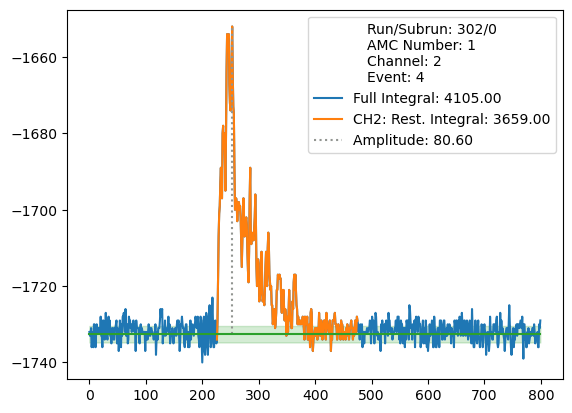

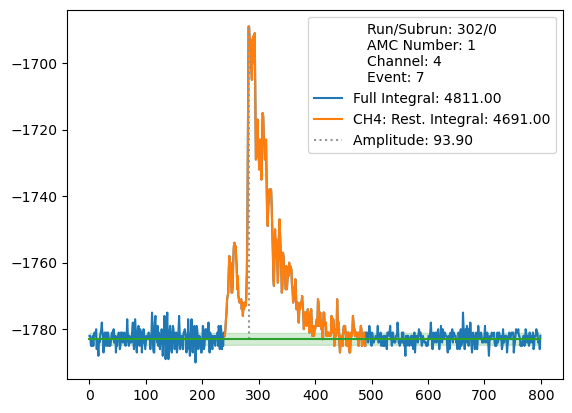

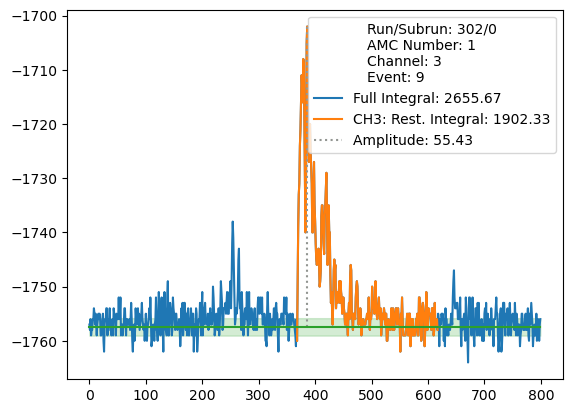

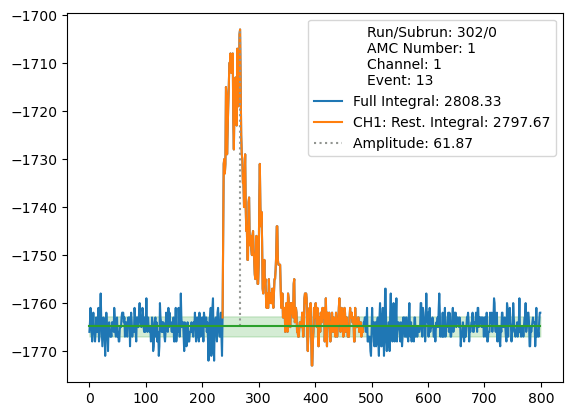

In [12]:
counter = 0
for i, e in enumerate(t):
    for wfi in e.integrals:
        if wfi.amplitude < 100:
            plot_integral(wfi)
            counter += 1
            plt.show()
    if(counter > 5):
        break

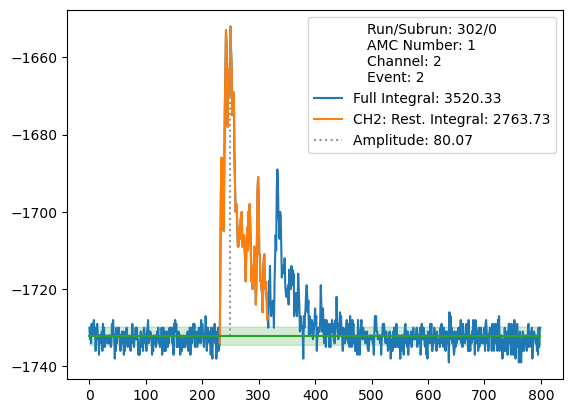

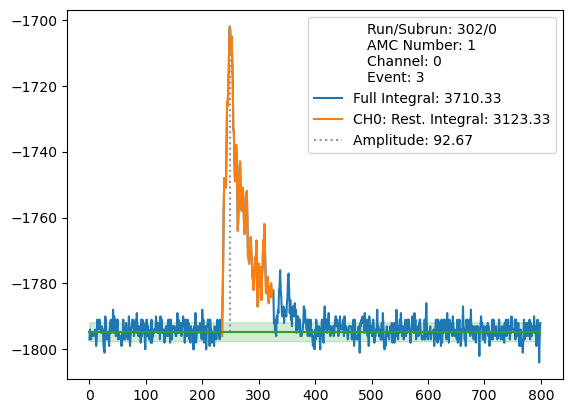

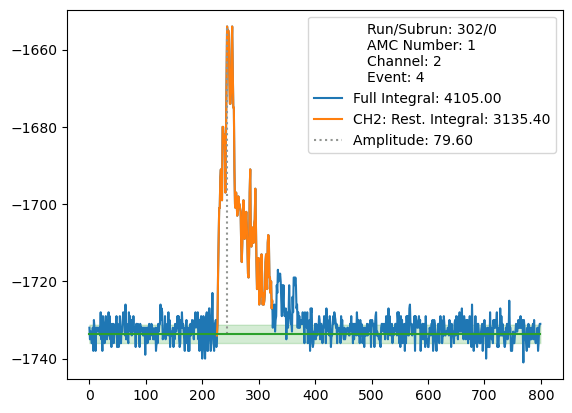

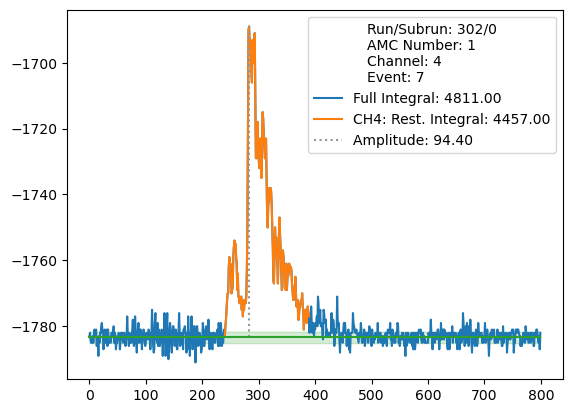

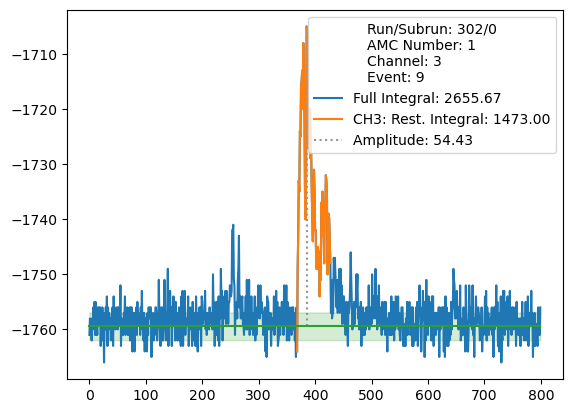

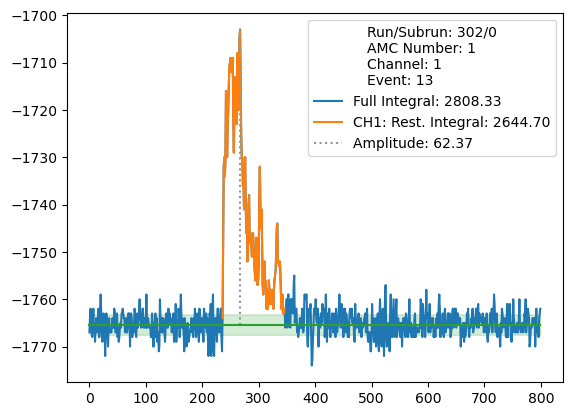

In [36]:
counter = 0
for i, e in enumerate(t2):
    for wfi in e.integrals:
        if wfi.amplitude < 100:
            plot_integral(wfi)
            counter += 1
            plt.show()
    if(counter > 5):
        break